In [1]:
import numpy as np
from sparseSampling import sparseSampling
from EISGame import EISGame
from valueIteration import valueIteration
from discretizer import discretizer
from EIS import SLModel
import pprint
import matplotlib.pyplot as plt

In [2]:
# Parameters
Rmax = 1.5
epsilon = 0.5
gamma = 0.3
stateRange = [-1,1]
numIntervals = 20
C = 20
H = 3
EISIterations = 1
Nt = 5
# v.V

In [3]:
# Test Objects
g = EISGame()
d = discretizer(stateRange,numIntervals)
s = sparseSampling(gamma=gamma,G = g,Rmax = Rmax, epsilon = epsilon )
s.H = H
s.C = C
v = valueIteration(G=g,stateRange=[-1,1],numInterval=numIntervals,C=C,gamma=gamma,discretizer=d)

The starting state is -0.1073932404048461


In [4]:
# Parameters
Rmax = 1.5
epsilon = 0.5
gamma = 0.3
stateRange = [-1,1]
numIntervals = 200
C = 10
H = 2
EISIterations = 10
Nt = 500
# v.V

In [5]:
# Run Value Iteration
nValueIteration = 1000
d = discretizer(stateRange,numIntervals)
v = valueIteration(G=g,stateRange=[-1,1],numInterval=numIntervals,C=C,gamma=gamma,discretizer=d)
for i in range(0,nValueIteration):
    v.nextIteration()

The starting state is 0.8393658836832267


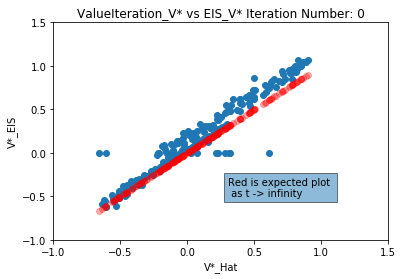

The starting state is -0.3956214274979448


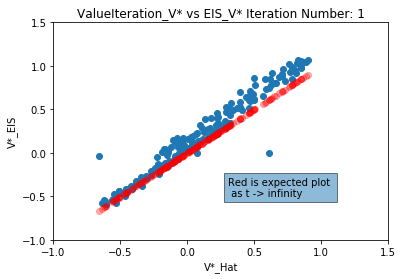

The starting state is -0.12322123621980641


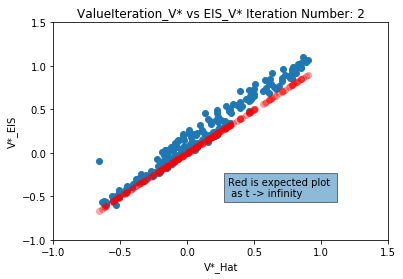

The starting state is 0.9360770015692783


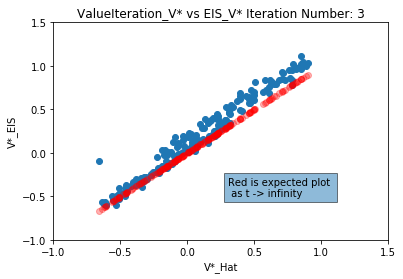

The starting state is -0.973607646691169


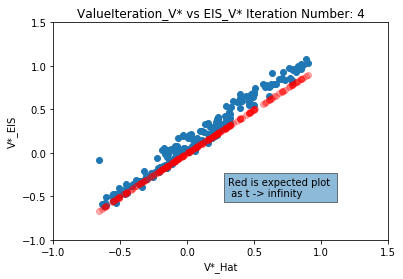

The starting state is 0.05374882773788836


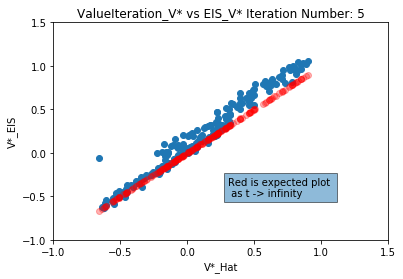

The starting state is 0.9019185558783396


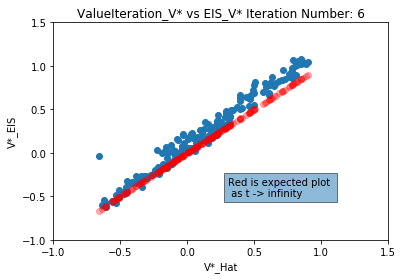

The starting state is -0.6929830723038799


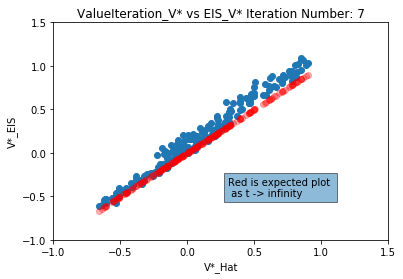

The starting state is 0.6564344431812168


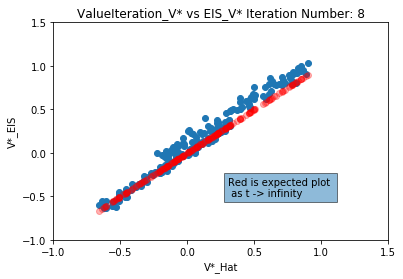

The starting state is -0.3732148705685181


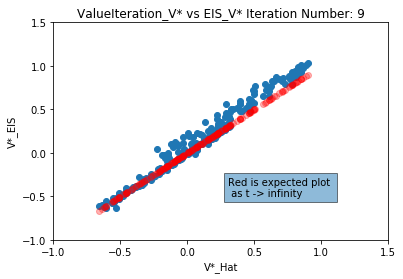

In [36]:
# Building EIS

model = None
slModel = SLModel(d)
for t in range(0,EISIterations): # run for t iterations
    g = EISGame() # Intialize a new game each round
    data = [(0,0)]*Nt
    for k in range(0,Nt): 
        s = sparseSampling(gamma=gamma,G = g,Rmax = Rmax, epsilon = epsilon,model = model ) # Explore
        s.H = H
        s.C = C
        sampledState =  np.random.uniform(-1,1)
        if sampledState <= 0: # Improve
            V = min(s.estimateQ(s.H,sampledState,turn=1)) # player 2
        else:
            V = max(s.estimateQ(s.H,sampledState, turn=0)) # player 1
        data[k]=(sampledState,V) # Generate Data
    model = slModel
    model.updateValues(data)
#     pprint.pprint(model.V)
    plt.scatter(x= list(v.V.values()),y= list(model.V.values()))
    plt.scatter(x = list(v.V.values()),y = list(v.V.values()),color='r',alpha=0.3)
    plt.text(0.3,-0.5, 'Red is expected plot \n as t -> infinity', bbox=dict(facecolor=None, alpha=0.5))    
    plt.xlabel("V*_Hat")
    plt.ylabel("V*_EIS")
    plt.xlim([-1,1.5])
    plt.ylim([-1,1.5])
    plt.title("ValueIteration_V* vs EIS_V* " + "Iteration Number: "+ str(t))
    plt.show()
    